In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

**1: Explorando dígitos escritos a mano**

**En el práctico anterior (análisis de dígitos manuscritos), los datos fueron proyectados a dos dimensiones a los fines de poder visualizarlos. Sin embargo, también podrían ser usados como representación para tareas de clasificación. Analice que sucede en este caso, si la dimensionalidad se reduce a 2, 4, 8, 16 y 32 dimensiones. En caso de haber una mejora con estas dimensiones reducidas identifique en cuales dígitos se ha producido una mejora más significativa.**

In [0]:
digits=load_digits()
X=digits.data

print("Original shape: {}".format(str(X.shape)))
dim=[2,4,8,16,32]

for i in dim:
  pca = PCA(n_components=i)
  pca.fit(X)
  xPca = pca.transform(X)
  xTrain, xTest, yTrain, yTest = train_test_split(xPca, digits.target,random_state = 0)
  scaler = MinMaxScaler()
  xTrain=scaler.fit_transform(xTrain)
  xTest=scaler.transform(xTest)
  model = KNeighborsClassifier(5)
  model.fit(xTrain, yTrain)
  pred=model.predict(xTest)
  print('K=5 | Componentes: ',i, ' | Accuracy:{:.4f}'.format(accuracy_score(yTest,pred)))

Original shape: (1797, 64)
K=5 | Componentes:  2  | Accuracy:0.6044
K=5 | Componentes:  4  | Accuracy:0.8556
K=5 | Componentes:  8  | Accuracy:0.9556
K=5 | Componentes:  16  | Accuracy:0.9778
K=5 | Componentes:  32  | Accuracy:0.9844


RTA: Para un K=5, con un numero de componentes=32, se obtiene el mismo rendimiento que en el modelo del ejercicio 1 del practico anterior. La ventaja es que en este modelo trabajo con 1/2 de los componentes totales, ahorrando por lo tanto en coste de procesamiento de los datos.
Aunque tambien es posible trabajar con un numero de componentes mucho menor como 16 u 8, a costa de perder un poco de accuracy, todo dependera de el uso que se le de al modelo.

(450, 32)

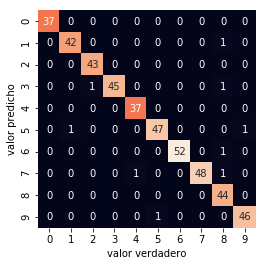

In [0]:
pca = PCA(n_components=32)
pca.fit(X)
xPca = pca.transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(xPca, digits.target,random_state = 0)
model=KNeighborsClassifier(5)
model.fit(xTrain,yTrain)
pred=model.predict(xTest)
mat = confusion_matrix(yTest, pred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho')
xTest.shape

RTA: Segun la matriz de confusion, se puede ver que hay una mejora en la lectura de algunos digitos, los cuales en el modelo anterior tenian la mayor taza de error. Como por el ejemplo el numero 8 y el numero 3.